Практична робота №2


Точка перегину t = 2.766, x = 24.956
Точка перегину t = 2.184, x = 49.679
Точка перегину t = 1.743, x = 74.107
Точка перегину t = 1.463, x = 99.071
Точка перегину t = 1.122, x = 149.958
Точка перегину t = 0.902, x = 194.367


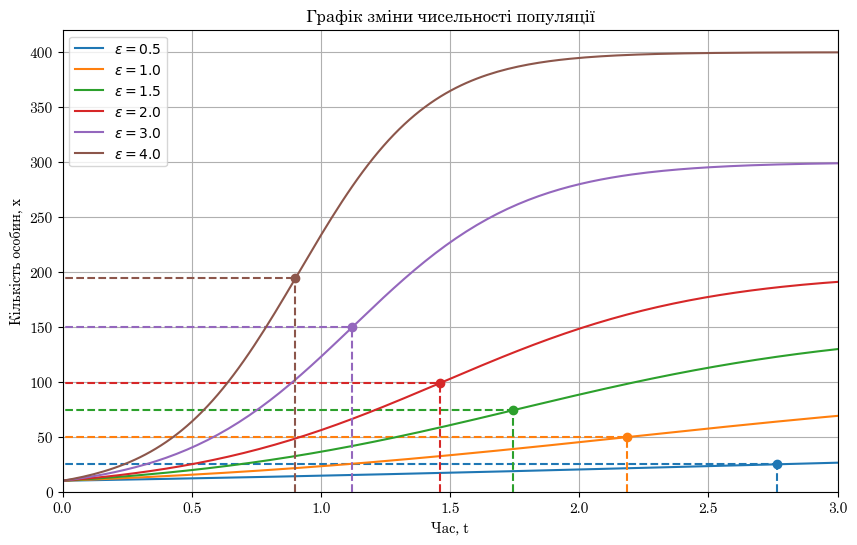

,"Коефіцієнт росту, ε","Коефіцієнт пропорціності, δ","Початкова чисельність популяції, x0","Точка перегину, x_k","Точка перегину, t_k","Максимум кількості особин, xст","Час настання плато, Tст"
0,0.5,0.01,10,24.955890,2.765531,467,9.358717
1,1.0,0.01,10,49.678608,2.184369,337,6.753507
2,1.5,0.01,10,74.106535,1.743487,241,4.829659
3,2.0,0.01,10,99.070663,1.462926,189,3.787575
4,3.0,0.01,10,149.957823,1.122244,133,2.665331
5,4.0,0.01,10,194.366769,0.901804,104,2.084168


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Century Schoolbook'

x0 = 10  
delta = 0.01 
epsilon_values = [0.5, 1, 1.5, 2, 3, 4] 
t = np.linspace(0, 10, 500)  

epsilon_list, delta_list, x0_list, x_k_list, t_k_list, plateau_x_list, plateau_time_list = [], [], [], [], [], [], []

plt.figure(figsize=(10, 6))

for epsilon in epsilon_values:
    x = (x0 * epsilon) / (((epsilon - delta * x0) * np.exp(-epsilon * t)) + delta * x0)
    plt.plot(t, x, label=r'$\epsilon = {:.1f}$'.format(epsilon))
    
    plateau_x = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
    plateau_time = t[plateau_x]
    
    dx_dt = np.gradient(x, t)
    d2x_dt2 = np.gradient(dx_dt, t)

    inflection_indices = np.where(np.diff(np.sign(d2x_dt2)))[0]

    if inflection_indices.size > 0:
        inflection_index = inflection_indices[0]
        t_k = t[inflection_index]
        x_k = x[inflection_index]
        print(f"Точка перегину t = {t_k:.3f}, x = {x_k:.3f}")
    else:
        print("Точкаа перегину відсутня")
    
    curve_color = plt.gca().lines[-1].get_color() 
    plt.vlines(t_k, -10, x_k, color=curve_color, linestyle='--')
    plt.hlines(x_k, -10, t_k, color=curve_color, linestyle='--')
    plt.plot(t_k, x_k, 'o', color=curve_color)

    epsilon_list.append(epsilon)
    delta_list.append(delta)
    x0_list.append(x0)
    x_k_list.append(x_k)
    t_k_list.append(t_k)
    plateau_x_list.append(plateau_x)
    plateau_time_list.append(plateau_time)

plt.ylim(0, )
plt.xlim(0, 3)
plt.xlabel('Час, t')
plt.ylabel('Кількість особин, x')
plt.title('Графік зміни чисельності популяції')
plt.legend()
plt.grid()
plt.show()

results_df = pd.DataFrame({
    'Коефіцієнт росту, ε': epsilon_list,
    'Коефіцієнт пропорціності, δ': delta_list,
    'Початкова чисельність популяції, x0': x0_list,
    'Точка перегину, x_k': x_k_list,
    'Точка перегину, t_k': t_k_list,
    'Максимум кількості особин, xст': plateau_x_list, 
    'Час настання плато, Tст': plateau_time_list
})

results_df


Inflection point found at t = 3.788, x = 9873.747
Inflection point found at t = 1.082, x = 49.092
Inflection point found at t = 0.681, x = 24.692
Inflection point found at t = 0.421, x = 16.617
Inflection point found at t = 0.200, x = 12.470
No inflection point found.


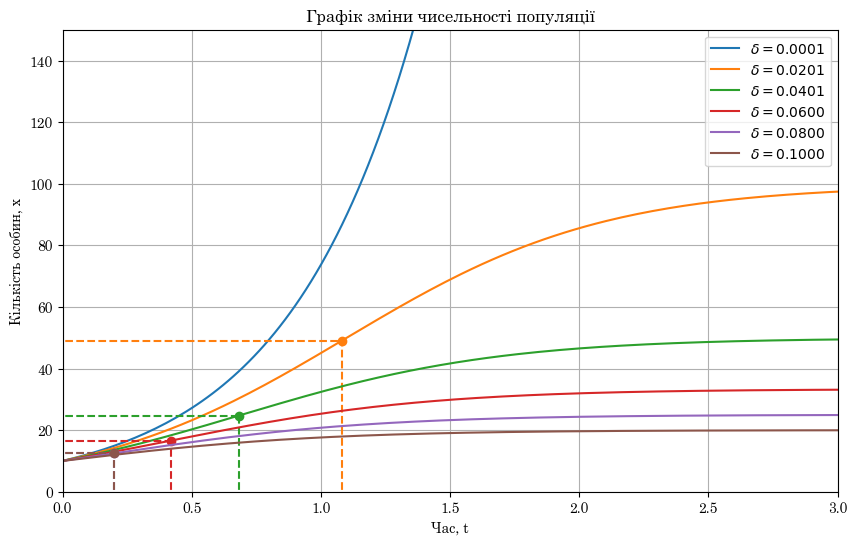

,"Коефіцієнт росту, ε","Коефіцієнт пропорціності, δ","Початкова чисельність популяції, x0","Точка перегину, x_k","Точка перегину, t_k","Максимум кількості особин, xст","Час настання плато, Tст"
0,2,0.00010,10,9873.746539,3.787575,305,6.112224
1,2,0.02008,10,49.092195,1.082164,170,3.406814
2,2,0.04006,10,24.691786,0.681363,150,3.006012
3,2,0.06004,10,16.616736,0.420842,136,2.725451
4,2,0.08002,10,12.470340,0.200401,125,2.505010
5,2,0.10000,10,12.470340,0.200401,115,2.304609


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Century Schoolbook'

x0 = 10  
delta_values = np.linspace(0.0001, 0.1, 6) 
epsilon = 2
t = np.linspace(0, 10, 500)  

epsilon_list, delta_list, x0_list, x_k_list, t_k_list, plateau_x_list, plateau_time_list = [], [], [], [], [], [], []

plt.figure(figsize=(10, 6))
for delta in delta_values:
    x = (x0 * epsilon) / (((epsilon - delta * x0) * np.exp(-epsilon * t)) + delta * x0)
    plt.plot(t, x, label=r'$\delta = {:.4f}$'.format(delta))
    
    plateau_x = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
    plateau_time = t[plateau_x]
    
    dx_dt = np.gradient(x, t)
    d2x_dt2 = np.gradient(dx_dt, t)

    inflection_indices = np.where(np.diff(np.sign(d2x_dt2)))[0]

    if inflection_indices.size > 0:
        inflection_index = inflection_indices[0]
        t_k = t[inflection_index]
        x_k = x[inflection_index]
        print(f"точка перегину t = {t_k:.3f}, x = {x_k:.3f}")
    else:
        print("Точка перегину відсутня")

    curve_color = plt.gca().lines[-1].get_color() 
    plt.vlines(t_k, -10, x_k, color=curve_color, linestyle='--')
    plt.hlines(x_k, -10, t_k, color=curve_color, linestyle='--')
    plt.plot(t_k, x_k, 'o', color=curve_color)

    epsilon_list.append(epsilon)
    delta_list.append(delta)
    x0_list.append(x0)
    x_k_list.append(x_k)
    t_k_list.append(t_k)
    plateau_x_list.append(plateau_x) 
    plateau_time_list.append(plateau_time)

plt.ylim(0, 150)
plt.xlim(0, 3)
plt.xlabel('Час, t')
plt.ylabel('Кількість особин, x')
plt.title('Графік зміни чисельності популяції')
plt.legend()
plt.grid()
plt.show()

results_df = pd.DataFrame({
    'Коефіцієнт росту, ε': epsilon_list,
    'Коефіцієнт пропорціності, δ': delta_list,
    'Початкова чисельність популяції, x0': x0_list,
    'Точка перегину, x_k': x_k_list,
    'Точка перегину, t_k': t_k_list,
    'Максимум кількості особин, xст': plateau_x_list, 
    'Час настання плато, Tст': plateau_time_list
})

results_df

Inflection point found at t = 2.645, x = 99.864
Inflection point found at t = 1.423, x = 99.122
Inflection point found at t = 1.062, x = 97.996
Inflection point found at t = 0.842, x = 98.219
Inflection point found at t = 0.681, x = 99.133
Inflection point found at t = 0.541, x = 99.178


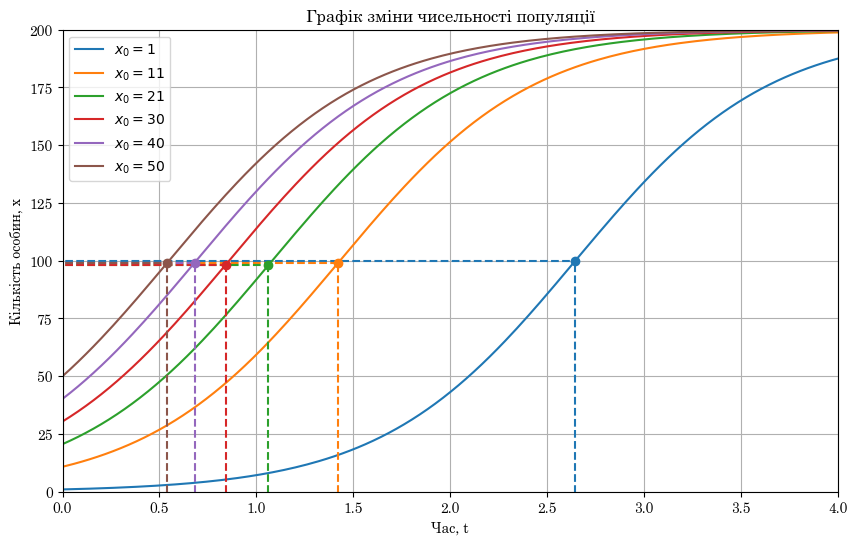

,"Коефіцієнт росту, ε","Коефіцієнт пропорціності, δ","Початкова чисельність популяції, x0","Точка перегину, x_k","Точка перегину, t_k","Максимум кількості особин, xст","Час настання плато, Tст"
0,2,0.01,1.0,99.863817,2.6,247,4.9
1,2,0.01,10.8,99.121666,1.4,187,3.7
2,2,0.01,20.6,97.996349,1.1,169,3.4
3,2,0.01,30.4,98.218519,0.8,158,3.2
4,2,0.01,40.2,99.133492,0.7,150,3.0
5,2,0.01,50.0,99.177621,0.5,143,2.9


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x0_values = np.linspace(1, 50, 6)
delta = 0.01
epsilon = 2
t = np.linspace(0, 10, 500)  

epsilon_list, delta_list, x0_list, x_k_list, t_k_list, plateau_x_list, plateau_time_list = [], [], [], [], [], [], []

plt.figure(figsize=(10, 6))
for x0 in x0_values:
    x = (x0 * epsilon) / (((epsilon - delta * x0) * np.exp(-epsilon * t)) + delta * x0)
    plt.plot(t, x, label=r'$x_0 = {:.0f}$'.format(x0))
    
    plateau_x = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
    plateau_time = t[plateau_x]
    
    dx_dt = np.gradient(x, t)
    d2x_dt2 = np.gradient(dx_dt, t)
    
    inflection_indices = np.where(np.diff(np.sign(d2x_dt2)))[0]

    if inflection_indices.size > 0:
        inflection_index = inflection_indices[0]
        t_k = t[inflection_index]
        x_k = x[inflection_index]
        print(f"Inflection point found at t = {t_k:.3f}, x = {x_k:.3f}")
    else:
        print("No inflection point found.")
    
    curve_color = plt.gca().lines[-1].get_color() 
    plt.vlines(t_k, -10, x_k, color=curve_color, linestyle='--')
    plt.hlines(x_k, -10, t_k, color=curve_color, linestyle='--')
    plt.plot(t_k, x_k, 'o', color=curve_color)

    epsilon_list.append(epsilon)
    delta_list.append(delta)
    x0_list.append(x0)
    x_k_list.append(x_k)
    t_k_list.append(round(t_k, 1))
    plateau_x_list.append(plateau_x)
    plateau_time_list.append(round(plateau_time, 1))

plt.ylim(0, 200)
plt.xlim(0, 4)
plt.xlabel('Час, t')
plt.ylabel('Кількість особин, x')
plt.title('Графік зміни чисельності популяції')
plt.legend()
plt.grid()
plt.show()

results_df = pd.DataFrame({
    'Коефіцієнт росту, ε': epsilon_list,
    'Коефіцієнт пропорціності, δ': delta_list,
    'Початкова чисельність популяції, x0': x0_list,
    'Точка перегину, x_k': x_k_list,
    'Точка перегину, t_k': t_k_list,
    'Максимум кількості особин, xст': plateau_x_list, 
    'Час настання плато, Tст': plateau_time_list
})

results_df

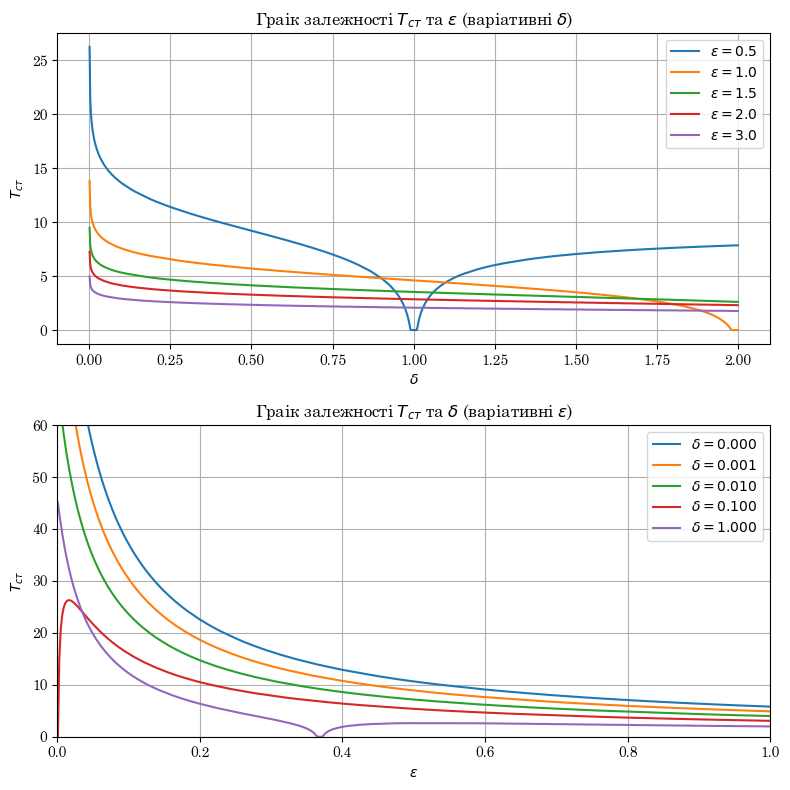

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 1  
t = np.linspace(0, 100, 10000)

epsilon_constants = [0.5, 1.0, 1.5, 2.0, 3.0] 
delta_constants = [0.0001, 0.001, 0.01, 0.1, 1.0]  

plateau_times_delta = []
plateau_times_epsilon = []

for epsilon in epsilon_constants:
    delta_plateau_times = []
    for delta in np.linspace(0.0001, 1.0, 1000):  
        x = (x0 * epsilon) / (((epsilon - delta * x0) * np.exp(-epsilon * t)) + delta * x0)
        plateau_index = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
        delta_plateau_times.append(t[plateau_index])
    plateau_times_delta.append(delta_plateau_times)

for delta in delta_constants:
    epsilon_plateau_times = []
    for epsilon in np.linspace(0.1, 5.0, 1000):  
        x = (x0 * epsilon) / (((epsilon - delta * x0) * np.exp(-epsilon * t)) + delta * x0)
        plateau_index = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
        epsilon_plateau_times.append(t[plateau_index])
    plateau_times_epsilon.append(epsilon_plateau_times)

plateau_times_delta = np.array(plateau_times_delta)
plateau_times_epsilon = np.array(plateau_times_epsilon)

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
for i, epsilon in enumerate(epsilon_constants):
    plt.plot(np.linspace(0.001, 2.0, 1000), plateau_times_delta[i], label=r'$\epsilon = {:.1f}$'.format(epsilon))
plt.xlabel(r'$\delta$')
plt.ylabel(r'$T_{ст}$')
plt.title(r'Граік залежності $T_{ст}$ та $\epsilon$ (варіативні $\delta$)')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
for i, delta in enumerate(delta_constants):
    plt.plot(np.linspace(0.001, 2.0, 1000), plateau_times_epsilon[i], label=r'$\delta = {:.3f}$'.format(delta))
plt.xlim(0, 1)
plt.ylim(0, 60)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$T_{ст}$')
plt.title(r'Граік залежності $T_{ст}$ та $\delta$ (варіативні $\epsilon$)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



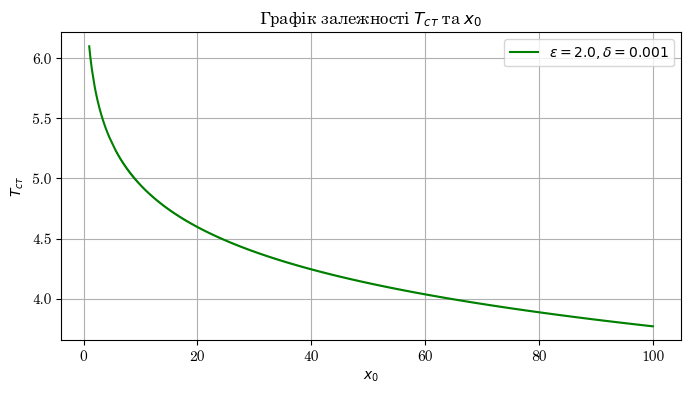

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Century Schoolbook'

t = np.linspace(0, 10, 10000) 

epsilon = 2.0
delta = 0.001

plateau_times_x0 = []

x0_values = np.linspace(1, 100, 10000) 
for x0 in x0_values:
    x = (x0 * epsilon) / (((epsilon - delta * x0) * np.exp(-epsilon * t)) + delta * x0)
    plateau_index = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
    plateau_times_x0.append(t[plateau_index])

plt.figure(figsize=(8, 4))
plt.plot(x0_values, plateau_times_x0, label=r'$\epsilon = {:.1f}, \delta = {:.3f}$'.format(epsilon, delta), color = 'green')

plt.xlabel(r'$x_0$')
plt.ylabel(r'$T_{ст}$')
plt.title(r'Графік залежності $T_{ст}$ та $x_0$')
plt.grid()
plt.legend()
plt.show()


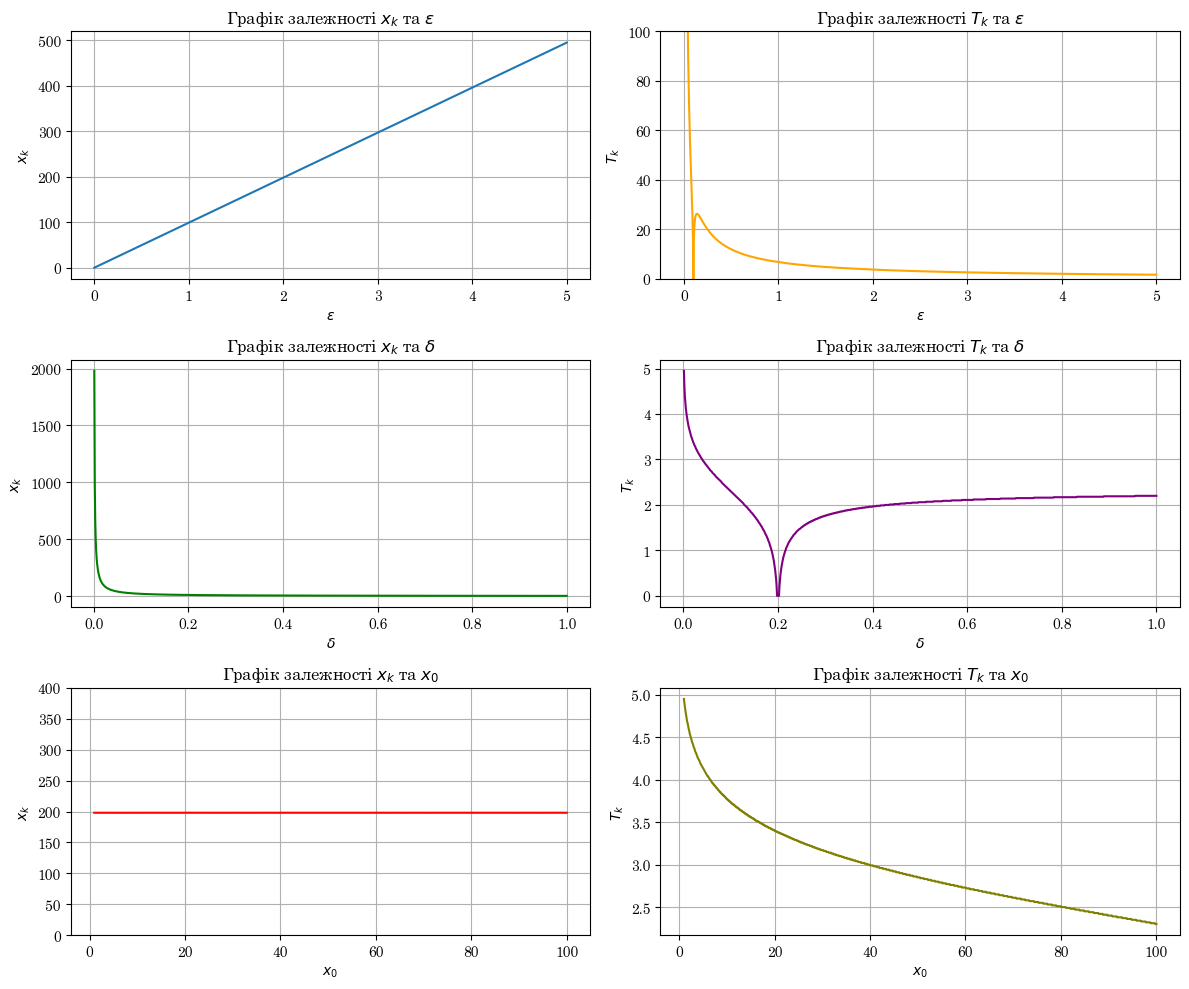

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1000, 100000)

epsilon_fixed = 2.0
delta_fixed = 0.01
x0_fixed = 10.0

epsilon_values = np.linspace(0.0001, 5, 1000)
delta_values = np.linspace(0.001, 1.0, 1000)
x0_values = np.linspace(1, 100, 1000)

xk_epsilon, tk_epsilon = [], []
xk_delta, tk_delta = [], []
xk_x0, tk_x0 = [], []

for epsilon in epsilon_values:
    x = (x0_fixed * epsilon) / (((epsilon - delta_fixed * x0_fixed) * np.exp(-epsilon * t)) + delta_fixed * x0_fixed)
    plateau_index = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
    xk_epsilon.append(x[plateau_index])
    tk_epsilon.append(t[plateau_index])

for delta in delta_values:
    x = (x0_fixed * epsilon_fixed) / (((epsilon_fixed - delta * x0_fixed) * np.exp(-epsilon_fixed * t)) + delta * x0_fixed)
    plateau_index = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
    xk_delta.append(x[plateau_index])
    tk_delta.append(t[plateau_index])

for x0 in x0_values:
    x = (x0 * epsilon_fixed) / (((epsilon_fixed - delta_fixed * x0) * np.exp(-epsilon_fixed * t)) + delta_fixed * x0)
    plateau_index = np.where(np.isclose(x, x[-1], rtol=0.01))[0][0]
    xk_x0.append(x[plateau_index])
    tk_x0.append(t[plateau_index])

plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(epsilon_values, xk_epsilon)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$x_k$')
plt.title(r'Графік залежності $x_k$ та $\epsilon$')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(epsilon_values, tk_epsilon, color = 'orange')
plt.ylim(0, 100)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$T_k$')
plt.title(r'Графік залежності $T_k$ та $\epsilon$')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(delta_values, xk_delta, color = 'green')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$x_k$')
plt.title(r'Графік залежності $x_k$ та $\delta$')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(delta_values, tk_delta, color = 'purple')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$T_k$')
plt.title(r'Графік залежності $T_k$ та $\delta$')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(x0_values, xk_x0, color = 'red')
plt.ylim(0, 400)
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_k$')
plt.title(r'Графік залежності $x_k$ та $x_0$')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(x0_values, tk_x0, color = 'olive')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$T_k$')
plt.title(r'Графік залежності $T_k$ та $x_0$')
plt.grid()

plt.tight_layout()
plt.show()
